# Credit Risk Analysis

In [4]:
!pip install -- upgrade pip
!pip install -- upgrade ipython jupyter

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.
  Could not find a version that satisfies the requirement upgrade (from versions: )
No matching distribution found for upgrade
You are using pip version 19.0.2, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.
  Could not find a version that satisfies the requirement upgrade (from versions: )
No matching distribution found for upgrade
You are using pip version 19.0.2, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [9]:
#!pip install pandas
#import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

AttributeError: 'module' object has no attribute 'plotting'

In [ ]:
df=pd.read_csv("E:\Training\german_credit_data.csv")

In [ ]:
df

In [6]:
original_df = df.copy()

In [7]:
df = df.rename(columns={"Credit amount": "Credit_amount"})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
s.no                1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit_amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(5), object(6)
memory usage: 86.0+ KB


In [9]:
df.describe()

,s.no,Age,Job,Credit_amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [10]:
df.columns

Index([u's.no', u'Age', u'Sex', u'Job', u'Housing', u'Saving accounts',
       u'Checking account', u'Credit_amount', u'Duration', u'Purpose',
       u'Risk'],
      dtype='object')

In [11]:
df.isnull().sum().sort_values(ascending=False)

Checking account    394
Saving accounts     183
Risk                  0
Purpose               0
Duration              0
Credit_amount         0
Housing               0
Job                   0
Sex                   0
Age                   0
s.no                  0
dtype: int64

In [12]:
df["Sex"].value_counts()

male      690
female    310
Name: Sex, dtype: int64

In [13]:
df["Saving accounts"].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [14]:
#  Gender vs Purpose let's see the purpose of credit loans for each gender.
df["Purpose"].unique()
sex_purpose = pd.crosstab(df['Purpose'], df['Sex']).apply(lambda x: x/x.sum() * 100)
sex_purpose

Sex,female,male
Purpose,,
business,6.129032,11.304348
car,30.322581,35.217391
domestic appliances,1.935484,0.869565
education,7.741935,5.072464
furniture/equipment,23.870968,15.507246
radio/TV,27.419355,28.260870
repairs,1.612903,2.463768
vacation/others,0.967742,1.304348


In [15]:
number_of_jobs = pd.crosstab(df["Job"], df["Sex"]).apply(lambda x: x/x.sum() * 100)
number_of_jobs

Sex,female,male
Job,,
0,3.870968,1.449275
1,20.645161,19.710145
2,63.548387,62.753623
3,11.935484,16.086957


In [16]:
df['Age_Group'] = np.nan

lst = [df]

for col in lst:
    col.loc[(col['Age'] > 18) & (col['Age'] <= 29), 'Age_Group'] = 'Young'
    col.loc[(col['Age'] > 29) & (col['Age'] <= 40), 'Age_Group'] = 'Young Adults'
    col.loc[(col['Age'] > 40) & (col['Age'] <= 55), 'Age_Group'] = 'Senior'
    col.loc[col['Age'] > 55, 'Age_Group'] = 'Elder' 
    
df.head()

,s.no,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit_amount,Duration,Purpose,Risk,Age_Group
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Elder
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Young
2,2,49,male,1,own,little,NaN,2096,12,education,good,Senior
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Senior
4,4,53,male,2,free,little,little,4870,24,car,bad,Senior


In [17]:
good_credit_df = df.loc[df['Risk'] == "good"]
bad_credit_df = df.loc[df['Risk'] == "bad"]

good_credit_df.head()

,s.no,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit_amount,Duration,Purpose,Risk,Age_Group
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Elder
2,2,49,male,1,own,little,NaN,2096,12,education,good,Senior
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Senior
5,5,35,male,1,free,NaN,NaN,9055,36,education,good,Young Adults
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good,Senior


In [18]:
# We have some missing value so we will just ignore the missing values in this analysis.
df["Checking account"].unique()
df.columns

Index([u's.no', u'Age', u'Sex', u'Job', u'Housing', u'Saving accounts',
       u'Checking account', u'Credit_amount', u'Duration', u'Purpose', u'Risk',
       u'Age_Group'],
      dtype='object')

In [19]:
cross_checking = pd.crosstab(df['Risk'], df['Checking account']).apply(lambda x: x/x.sum() * 100)
decimals = pd.Series([2,2,2], index=['little', 'moderate', 'rich'])

cross_checking = cross_checking.round(decimals)
cross_checking

Checking account,little,moderate,rich
Risk,,,
bad,49.27,39.03,22.22
good,50.73,60.97,77.78


In [20]:
df['Risk_int'] = np.nan
lst = [df]

for col in lst:
    col.loc[df['Risk'] == 'bad', 'Risk_int'] = 0 
    col.loc[df['Risk'] == 'good', 'Risk_int'] = 1
    
    
df['Risk_int'] = df['Risk_int'].astype(int)
df.head()

,s.no,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit_amount,Duration,Purpose,Risk,Age_Group,Risk_int
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Elder,1
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Young,0
2,2,49,male,1,own,little,NaN,2096,12,education,good,Senior,1
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Senior,1
4,4,53,male,2,free,little,little,4870,24,car,bad,Senior,0


In [21]:
df['Purpose'].unique()

cross_purpose = pd.crosstab(df['Purpose'], df['Risk']).apply(lambda x: x/x.sum() * 100)
cross_purpose = cross_purpose.round(decimals=2)
cross_purpose.sort_values(by=['bad'])

Risk,bad,good
Purpose,,
domestic appliances,1.33,1.14
vacation/others,1.67,1.00
repairs,2.67,2.00
education,7.67,5.14
business,11.33,9.00
furniture/equipment,19.33,17.57
radio/TV,20.67,31.14
car,35.33,33.00


In [22]:
# Gender vs Purpose let's see the purpose of having credit loans for each gender.
df["Purpose"].unique()
sex_purpose = pd.crosstab(df['Purpose'], df['Sex']).apply(lambda x: x/x.sum() * 100)
sex_purpose

Sex,female,male
Purpose,,
business,6.129032,11.304348
car,30.322581,35.217391
domestic appliances,1.935484,0.869565
education,7.741935,5.072464
furniture/equipment,23.870968,15.507246
radio/TV,27.419355,28.260870
repairs,1.612903,2.463768
vacation/others,0.967742,1.304348


In [23]:
# Percent distribution of Gender (how many jobs does each gender have in %)
number_of_jobs = pd.crosstab(df["Job"], df["Sex"]).apply(lambda x: x/x.sum() * 100)
number_of_jobs

Sex,female,male
Job,,
0,3.870968,1.449275
1,20.645161,19.710145
2,63.548387,62.753623
3,11.935484,16.086957


In [24]:
df["Sex"]

0        male
1      female
2        male
3        male
4        male
5        male
6        male
7        male
8        male
9        male
10     female
11     female
12     female
13       male
14     female
15     female
16       male
17       male
18     female
19       male
20       male
21       male
22       male
23       male
24       male
25       male
26       male
27     female
28       male
29       male
        ...  
970      male
971      male
972    female
973      male
974    female
975    female
976    female
977      male
978      male
979      male
980      male
981      male
982    female
983      male
984      male
985    female
986      male
987    female
988      male
989      male
990      male
991      male
992      male
993      male
994      male
995    female
996      male
997      male
998      male
999      male
Name: Sex, Length: 1000, dtype: object

In [33]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()
df['Housing']=le.fit_transform(df['Housing'])
df['Age_Group']=le.fit_transform(df['Age_Group'])

In [34]:
df.drop(['Saving accounts','Checking account','Credit_amount','s.no'],axis=1,inplace=True)

ValueError: labels ['Saving accounts' 'Checking account' 'Credit_amount' 's.no'] not contained in axis

In [35]:
df

,Age,Sex,Job,Housing,Duration,Purpose,Risk,Age_Group,Risk_int
0,67,male,2,1,6,radio/TV,good,0,1
1,22,female,2,1,48,radio/TV,bad,2,0
2,49,male,1,1,12,education,good,1,1
3,45,male,2,0,42,furniture/equipment,good,1,1
4,53,male,2,0,24,car,bad,1,0
5,35,male,1,0,36,education,good,3,1
6,53,male,2,1,24,furniture/equipment,good,1,1
7,35,male,3,2,36,car,good,3,1
8,61,male,1,1,12,radio/TV,good,0,1
9,28,male,3,1,30,car,bad,2,0


In [36]:
df['Sex'].replace(['male','female'],[0,1],inplace=True)

In [71]:
type('Housing')

str

In [79]:
type(df)

pandas.core.frame.DataFrame

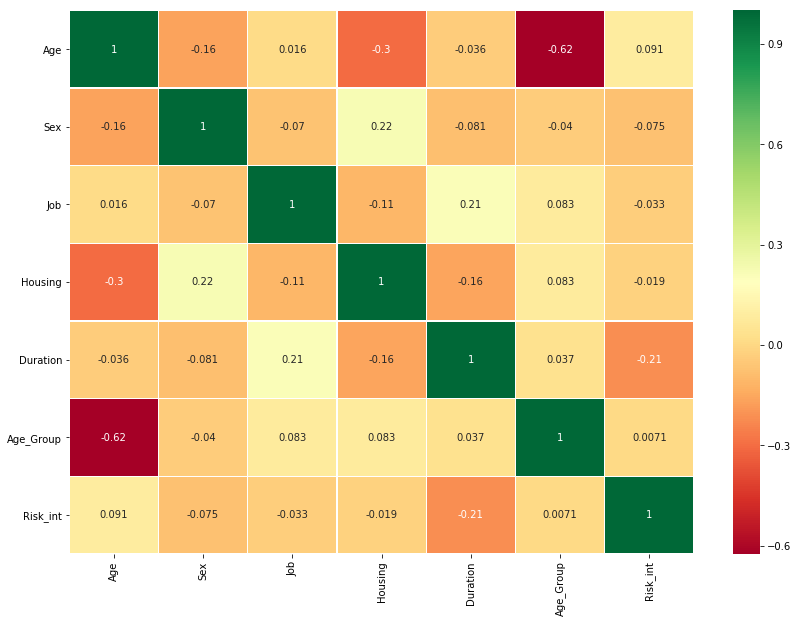

In [37]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(14,10)
plt.show()

In [38]:
x=df[["Age_Group","Sex","Housing"]]
y=df["Risk_int"]

In [39]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((700, 3), (300, 3), (700L,), (300L,))

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score,train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report

In [41]:
dt=DecisionTreeClassifier()
dt.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [42]:
cross_val_score(dt,x,y,cv=3,scoring='accuracy').mean()

0.693996391601182

In [149]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [150]:
pred_train=dt.predict(x_train)
pred_train

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,

In [151]:
accuracy_score(pred_train,y_train)

0.7053333333333334

In [152]:
pred_test=dt.predict(x_test)

In [153]:
accuracy_score(pred_test,y_test)

0.692

In [154]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [155]:
from sklearn import metrics
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
prediction=model.predict(x_test)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction,y_test))

('The accuracy of the Random Forests is', 0.696)


In [156]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.metrics import accuracy_score


In [157]:
model = LogisticRegression()
model.fit(x_train,y_train)
prediction3=model.predict(x_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,y_test))

('The accuracy of the Logistic Regression is', 0.704)


In [158]:
import statsmodels.api as sm
logit = sm.Logit(y_train, x_train)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.620907
         Iterations 5


In [159]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


[[  0  74]
 [  0 176]]


In [160]:
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.618651
         Iterations 5
                         Results: Logit
Model:              Logit            No. Iterations:   5.0000   
Dependent Variable: Risk_int         Pseudo R-squared: -0.013   
Date:               2019-02-13 02:03 AIC:              1243.3030
No. Observations:   1000             BIC:              1258.0262
Df Model:           2                Log-Likelihood:   -618.65  
Df Residuals:       997              LL-Null:          -610.86  
Converged:          1.0000           Scale:            1.0000   
-----------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
-----------------------------------------------------------------
Age_Group      0.2394    0.0557   4.2991  0.0000   0.1303  0.3486
Sex           -0.2602    0.1492  -1.7444  0.0811  -0.5525  0.0322
Housing        0.3326    0.1097   3.0322  0.0024   0.1176  0.5476



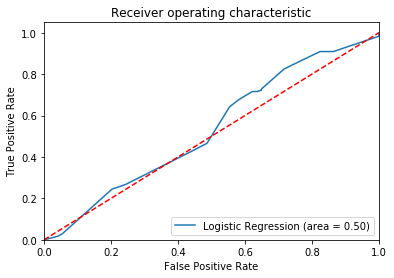

In [161]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [162]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22)

In [163]:
cv_result = cross_val_score(model,x,y, cv = kfold,scoring = "accuracy")
cv_result.mean()

0.7

In [164]:
train_using_gini(x_train, x_test, y_train):

SyntaxError: invalid syntax (<ipython-input-164-271126887ecb>, line 1)

In [165]:
clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=3, min_samples_leaf=5) 

In [166]:
clf_gini.fit(x_train, y_train) 
clf_gini 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [167]:
clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 3, min_samples_leaf = 5)

In [168]:
clf_entropy.fit(x_train, y_train) 
clf_entropy 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [170]:
y_pred = clf_object.predict(x_test) 
print("Predicted values:") 
print(y_pred) 
return y_pred 

NameError: name 'clf_object' is not defined

In [174]:
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred)) 

TypeError: 'numpy.ndarray' object is not callable